# Распределение поля в апертуре антенной решётки

Определим библиотеки с кодом из которых мы будем работать

In [146]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

to_rad = pi/180
to_deg = 180/pi

### Параметры решётки

In [147]:
# Параметры
f0 = 3 #ГГц
lmd = 30.0/f0 #см
k = 2*pi/lmd

Nx = 50
Ny = 50
dx = 0.8*lmd/2
dy = 0.6*lmd/2

# Пьедесталы
deltaX = 0.3
deltaY = 0.8

# Апертура
Lx = (Nx-1) * dx
Ly = (Ny-1) * dy

### Функции амплитудно-фазового распределения

In [148]:
def A(x, L, DeltaX):
    return DeltaX+(1-DeltaX)*((cos(pi*x/L))**2)

def A_xy(x,y):
    return A(x, Lx, deltaX)*A(y, Ly, deltaY)

def Psi(x,y,z,th,phi,time):
    return (k*((x*cos(phi) + y*sin(phi))*sin(th) + z*cos(th)) + 2*pi*f0*time)%(2*pi)

### Визуализация

In [149]:
def Gauss(x,m,sgm):
    return exp(-((x-m)**2)/(2*sgm*sgm))

def Red(psi):
    return Gauss(psi, pi/2, pi/3)

def Green(psi):
    return Gauss(psi, pi, pi/3)

def Blue(psi):
    return Gauss(psi, 3*pi/2, pi/3)

def Alpha(a):
    return a

In [156]:
th = 10*to_rad
phi = 0*to_rad
time = 0
a = []
psi = []
X = np.zeros(Nx)
Y = np.zeros(Ny)
for _i in range(Nx):
    a.append([])
    psi.append([])
    x = _i*dx - Lx/2
    X[_i] = x
    for _j in range(Ny):
        y = _j*dy - Ly/2
        p = Psi(x,y,0,th,phi,time)
        psi[_i].append(p)
        # a[_i].append(A_xy(x,y))
        a[_i].append([Red(p),Green(p),Blue(p),Alpha(A_xy(x,y))])
        

for _i in range (Ny):
    Y[_i] = _i * dy - Ly/2

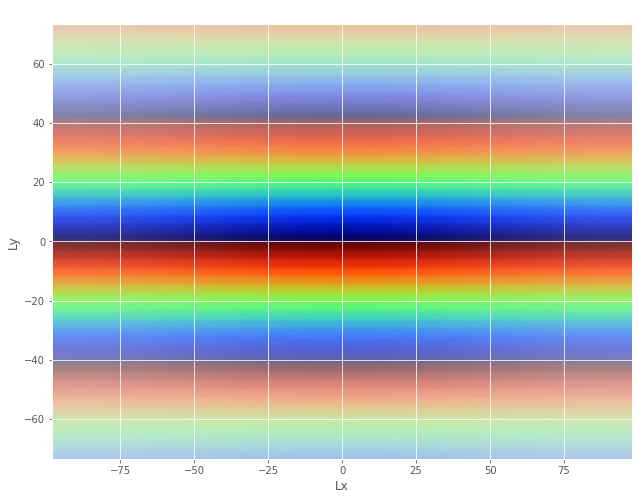

In [162]:
# plt.style.use('ggplot')
fig,ax = plt.subplots(figsize=(20, 8))
ax.imshow(a, interpolation='kaiser', extent=(-Lx/2, Lx/2, -Ly/2, Ly/2))
# ax.set_xlim(xmin=-Lx/2, xmax=Lx/2)
# ax.set_ylim(ymin=-Ly/2, ymax=Ly/2)
ax.set_xlabel('Lx')
ax.set_ylabel('Ly')
plt.show()